In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### We have used pickle file here instead of csv because, we changed data types of some variables in part 1 of the project and since data is stored in text format in csv file, it can't store data types. So, we decided to use pickle file of our data to get appropriate data type of variables 

In [3]:
 
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
%pip install pandas==1.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.7 MB 2.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
link = ('drive/MyDrive/Group_1_data_cleaned.pkl')
df = pd.read_pickle(link)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [5]:
# converting categorical variable into dummies

df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [6]:
df.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
2,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
3,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
4,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
5,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0


In [7]:
# defining target variable

X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [8]:
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


## Training base model of SVC with Non-linear kernel

In [10]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1, gamma = 0.1)
classifier.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.1)

In [11]:
X_test_scaled = scaler.transform(X_test)
y_pred = classifier.predict(X_test_scaled)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#accuracy of the model

print(accuracy_score(y_test, y_pred))

0.9629349140002621


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     12718
           1       1.00      0.95      0.98     55945

    accuracy                           0.96     68663
   macro avg       0.92      0.98      0.94     68663
weighted avg       0.97      0.96      0.96     68663



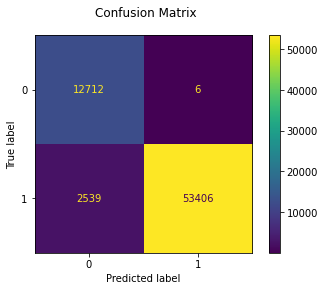

In [15]:
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(classifier, X_test_scaled, y_test, display_labels=classifier.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

## Hyperparameter tuning with Gridsearch CV


In [16]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv = KFold(n_splits=2, random_state=1, shuffle=True)
  
# defining parameter range
param_grid = {'C': [0.1, 1, 100], 
              'gamma': [1, 0.1, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=cv,verbose=3)
  
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time= 5.7min
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time= 5.4min
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time= 5.9min
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time= 6.2min
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.930 total time=15.1min
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.931 total time=15.8min
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.965 total time= 5.3min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.964 total time= 5.2min
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time= 5.2min
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time= 5.3min
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.956 total time= 8.7min
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;,

GridSearchCV(cv=KFold(n_splits=2, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
print(grid.best_params_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


## Modelling data using SVM with Non-linear kernel and Best Hyperparameter

In [18]:
grid_predictions = grid.predict(X_test_scaled) 

In [21]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, grid_predictions)))


Accuracy: 0.9651


In [20]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     12718
           1       0.99      0.96      0.98     55945

    accuracy                           0.97     68663
   macro avg       0.93      0.97      0.95     68663
weighted avg       0.97      0.97      0.97     68663

